In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Import for GridSearch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer 

In [2]:
df_test = pd.read_csv('aug_test.csv')
df_train = pd.read_csv('aug_test.csv')


In [3]:
def genderN(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def relevantExperienceN(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
#should we do something different here? Experience=Experience in years
    
def enrollmentUniversityN(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
    
    
def educationLevelN(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def majorDisciplineN(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experienceN(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def companyTypeN(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def companySizeN(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
#We set a boundary on >4 = 1 and <4 = 0
def lastNewJobN(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 0
    if x=='2'            :   return 0
    if x=='3'            :   return 0
    if x=='4'            :   return 0
    if x=='>4'           :   return 1

    
def CDIN(x):
    if x=='city_103'         : return  0
    if x=='city_40'          : return  1
    if x=='city_21'          : return  2
    if x=='city_115'         : return  3
    if x=='city_162'         : return  4
    if x=='city_176'         : return  5
    if x=='city_160'         : return  6
    if x=='city_46'          : return  7
    if x=='city_61'          : return  8
    if x=='city_114'         : return  9
    if x=='city_13'          : return  10
    if x=='city_159'         : return  11
    if x=='city_102'         : return  12
    if x=='city_67'          : return  13
    if x=='city_100'         : return  14
    if x=='city_16'          : return  15
    if x=='city_71'          : return  16
    if x=='city_104'         : return  17
    if x=='city_64'          : return  18
    if x=='city_101'         : return  19
    if x=='city_83'          : return  20
    if x=='city_105'         : return  21
    if x=='city_73'          : return  22
    if x=='city_75'          : return  23
    if x=='city_41'          : return  24
    if x=='city_11'          : return  25
    if x=='city_93'          : return  26
    if x=='city_90'          : return  27
    if x=='city_36'          : return  28
    if x=='city_20'          : return  29
    if x=='city_57'          : return  30
    if x=='city_152'         : return  31
    if x=='city_19'          : return  32
    if x=='city_65'          : return  33
    if x=='city_74'          : return  34
    if x=='city_173'         : return  35
    if x=='city_136'         : return  36
    if x=='city_98'          : return  37
    if x=='city_97'          : return  38
    if x=='city_50'          : return  39
    if x=='city_138'         : return  40
    if x=='city_82'          : return  41
    if x=='city_157'         : return  42
    if x=='city_89'          : return  43
    if x=='city_150'         : return  44
    if x=='city_70'          : return  45
    if x=='city_175'         : return  46
    if x=='city_94'          : return  47
    if x=='city_28'          : return  48
    if x=='city_59'          : return  49
    if x=='city_165'         : return  50
    if x=='city_145'         : return  51
    if x=='city_142'         : return  52
    if x=='city_26'          : return  53
    if x=='city_12'          : return  54
    if x=='city_37'          : return  55
    if x=='city_43'          : return  56
    if x=='city_116'         : return  57
    if x=='city_23'          : return  58
    if x=='city_99'          : return  59
    if x=='city_149'         : return  60
    if x=='city_10'          : return  61
    if x=='city_45'          : return  62
    if x=='city_80'          : return  63
    if x=='city_128'         : return  64
    if x=='city_158'         : return  65
    if x=='city_123'         : return  66
    if x=='city_7'           : return  67
    if x=='city_72'          : return  68
    if x=='city_106'         : return  69
    if x=='city_143'         : return  70
    if x=='city_78'          : return  71
    if x=='city_109'         : return  72
    if x=='city_24'          : return  73
    if x=='city_134'         : return  74
    if x=='city_48'          : return  75
    if x=='city_144'         : return  76
    if x=='city_91'          : return  77
    if x=='city_146'         : return  78
    if x=='city_133'         : return  79
    if x=='city_126'         : return  80
    if x=='city_118'         : return  81
    if x=='city_9'           : return  82
    if x=='city_167'         : return  83
    if x=='city_27'          : return  84
    if x=='city_84'          : return  85
    if x=='city_54'          : return  86
    if x=='city_39'          : return  87
    if x=='city_79'          : return  88
    if x=='city_76'          : return  89
    if x=='city_77'          : return  90
    if x=='city_81'          : return  91
    if x=='city_131'         : return  92
    if x=='city_44'          : return  93
    if x=='city_117'         : return  94
    if x=='city_155'         : return  95
    if x=='city_33'          : return  96
    if x=='city_141'         : return  97
    if x=='city_127'         : return  98
    if x=='city_62'          : return  99
    if x=='city_53'          : return  100
    if x=='city_25'          : return  101
    if x=='city_2'           : return  102
    if x=='city_69'          : return  103
    if x=='city_120'         : return  104
    if x=='city_111'         : return  105
    if x=='city_30'          : return  106
    if x=='city_1'           : return  107
    if x=='city_140'         : return  108
    if x=='city_179'         : return  109
    if x=='city_55'          : return  110
    if x=='city_14'          : return  111
    if x=='city_42'          : return  112
    if x=='city_107'         : return  113
    if x=='city_18'          : return  114
    if x=='city_139'         : return  115
    if x=='city_180'         : return  116
    if x=='city_166'         : return  117
    if x=='city_121'         : return  118
    if x=='city_129'         : return  119
    if x=='city_8'           : return  120
    if x=='city_31'          : return  121
    if x=='city_171'         : return  122


In [4]:
df_train['gender'] = df_train['gender'].apply(genderN)
df_train['relevent_experience'] = df_train['relevent_experience'].apply(relevantExperienceN)
df_train['enrolled_university'] = df_train['enrolled_university'].apply(enrollmentUniversityN)
df_train['education_level'] = df_train['education_level'].apply(educationLevelN)
df_train['major_discipline'] = df_train['major_discipline'].apply(majorDisciplineN)
df_train['experience'] = df_train['experience'].apply(experienceN)
df_train['company_type'] = df_train['company_type'].apply(companyTypeN)
df_train['company_size'] = df_train['company_size'].apply(companySizeN)
df_train['last_new_job'] = df_train['last_new_job'].apply(lastNewJobN)
df_train['city'] = df_train['city'].apply(CDIN)

In [5]:
df_train = df_train.fillna(df_train.mean(numeric_only=True))
df_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [6]:
df_train['last_new_job'] = df_train['last_new_job'].astype(int)

Logistic Regression

In [7]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [8]:
X_train = df_train[['gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_type', 'company_size', 'city']]
y_train = df_train['last_new_job']
logr = LogisticRegression()
logr.fit(X_train,y_train)

#print score
print("Score: {:.3f}".format(logr.score(X_train, y_train)))

#print coefficient
coefficient = logr.coef_
print(coefficient)

Score: 0.838
[[-5.22847932e-01  1.28133614e-01 -1.04848207e-01 -1.22755124e-01
  -1.06888361e-02  1.86638336e-01 -6.09672955e-02  2.62378969e-02
   4.31032449e-04]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision tree classifier

In [9]:
X_train = df_train[['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_type', 'company_size', 'city']]
y_train = df_train['last_new_job']
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: last_new_job, dtype: int64

In [10]:
dtree = tree.DecisionTreeClassifier(random_state = 17) 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [11]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))

Accuracy on training set: 0.972


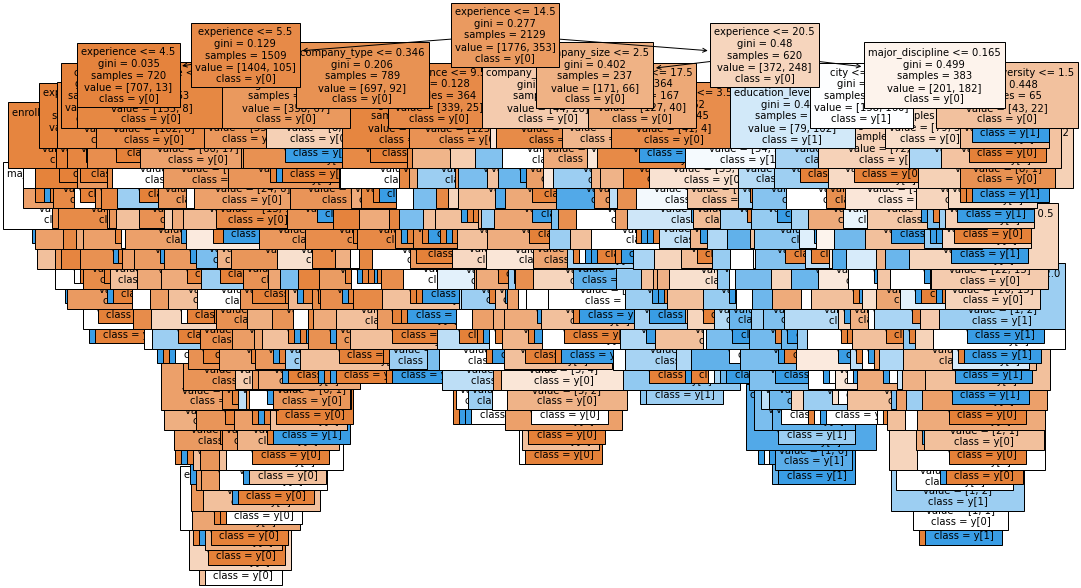

In [13]:
plt.figure(figsize=(17,10))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=True,
               feature_names=list(X_train.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('big_tree.png', bbox_inches='tight') # save plot as png file 

In [14]:
param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 10, 17],
                         'min_samples_leaf': [5, 8, 11]},

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring = 'accuracy', cv=5, verbose = 5)
grid.fit(X_train, y_train)

# print the best score obtained
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

# print the parameters that acheived the best score
print("Best parameters: ", grid.best_params_)
        

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.805 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.815 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.826 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=5;, score=0.840 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.805 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.815 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.826 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=8;, score=0.840 total time=   0.0s

Testing the model

In [ ]:
df_test['gender'] = df_test['gender'].apply(genderN)
df_test['relevent_experience'] = df_test['relevent_experience'].apply(relevantExperienceN)
df_test['enrolled_university'] = df_test['enrolled_university'].apply(enrollmentUniversityN)
df_test['education_level'] = df_test['education_level'].apply(educationLevelN)
df_test['major_discipline'] = df_test['major_discipline'].apply(majorDisciplineN)
df_test['experience'] = df_test['experience'].apply(experienceN)
df_test['company_type'] = df_test['company_type'].apply(companyTypeN)
df_test['company_size'] = df_test['company_size'].apply(companySizeN)
df_test['last_new_job'] = df_test['last_new_job'].apply(lastNewJobN)
df_test['city'] = df_test['city'].apply(CDIN)



In [ ]:
df_test = df_test.fillna(df_test.mean(numeric_only=True))
df_test.isna().sum()

In [17]:
df_test['last_new_job'] = df_test['last_new_job'].astype(int)

In [18]:
X_test = df_test[['gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_type', 'company_size', 'city']]
y_test = df_test['last_new_job']

In [19]:
y_pred=dtree.predict(X_test)

In [20]:
print('Accuracy: ', sum(y_test==y_pred)/len(y_test)) # by hand

from sklearn import metrics # by using metrics library
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9722874589008924
Accuracy:  0.9722874589008924
